<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>NLP with Deep Learning for Everyone</h1>
<h1>Sequence Modeling</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt 

from tqdm import tqdm
tqdm.pandas()

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 21.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 3f78bc053789ff3e9623063cff78b2751c54ddee

numpy     : 1.19.2
watermark : 2.1.0
keras     : 2.4.3
matplotlib: 3.3.2
json      : 2.0.9
pandas    : 1.1.3
tensorflow: 2.5.0



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load the IMDB dataset

In [4]:
top_words = 10000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

word_dict = imdb.get_word_index()
word_list = ["<PAD>", "<START>", "<UNK>", "<UNUSED>"]
word_list.extend([k for k, v in sorted(word_dict.items(), key = lambda x:x[1])])
word_list = np.array(word_list)

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# SimpleRNN model

In [6]:
model = Sequential()
model.add(Embedding(top_words, 32))

model.add(SimpleRNN(32))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 61s 208ms/step - loss: 0.6730 - accuracy: 0.5590 - val_loss: 0.4415 - val_accuracy: 0.8054
Epoch 2/10
196/196 [==============================] - 44s 223ms/step - loss: 0.3702 - accuracy: 0.8432 - val_loss: 0.3835 - val_accuracy: 0.8306
Epoch 3/10
196/196 [==============================] - 43s 218ms/step - loss: 0.2487 - accuracy: 0.9084 - val_loss: 0.3510 - val_accuracy: 0.8542
Epoch 4/10
196/196 [==============================] - 39s 201ms/step - loss: 0.1710 - accuracy: 0.9401 - val_loss: 0.4012 - val_accuracy: 0.8440
Epoch 5/10
196/196 [==============================] - 34s 173ms/step - loss: 0.1209 - accuracy: 0.9603 - val_loss: 0.4386 - val_accuracy: 0.8169
Epoch 6/10
196/196 [==============================] - 40s 202ms/step - loss: 0.0727 - accuracy: 0.9801 - val_loss: 0.4792 - val_accuracy: 0.8395
Epoch 7/10
196/196 [==============================] - 37s 191ms/step - loss: 0.0377 - accuracy: 0.9914 - val_loss: 0.5060 - val_ac

In [8]:
def plot_history(history):    
    fig, ax_lst = plt.subplots(1, 2, sharex=True, sharey=True)

    epochs = np.array(history.epoch) + 1
    
    ax_lst[0].plot(epochs, history.history['loss'], label='Training')
    ax_lst[0].plot(epochs, history.history['val_loss'], label='Testing')
    ax_lst[0].set_ylabel('Loss')
    ax_lst[0].set_xlabel('Epoch')
    ax_lst[0].set_xticks(epochs)
    
    best_epoch = np.argmin(history.history['val_loss']) + 1
    ax_lst[0].axvline(x=best_epoch, linestyle=':', color=colors[2])
    ax_lst[0].legend()
    

    ax_lst[1].plot(epochs, history.history['accuracy'], label='Training')
    ax_lst[1].plot(epochs, history.history['val_accuracy'], label='Testing')
    ax_lst[1].set_ylabel('Accuracy')
    ax_lst[1].set_xlabel('Epoch')
    ax_lst[1].set_xticks(epochs)
    ax_lst[1].axvline(x=best_epoch, linestyle=':', color=colors[2])


    fig.tight_layout()

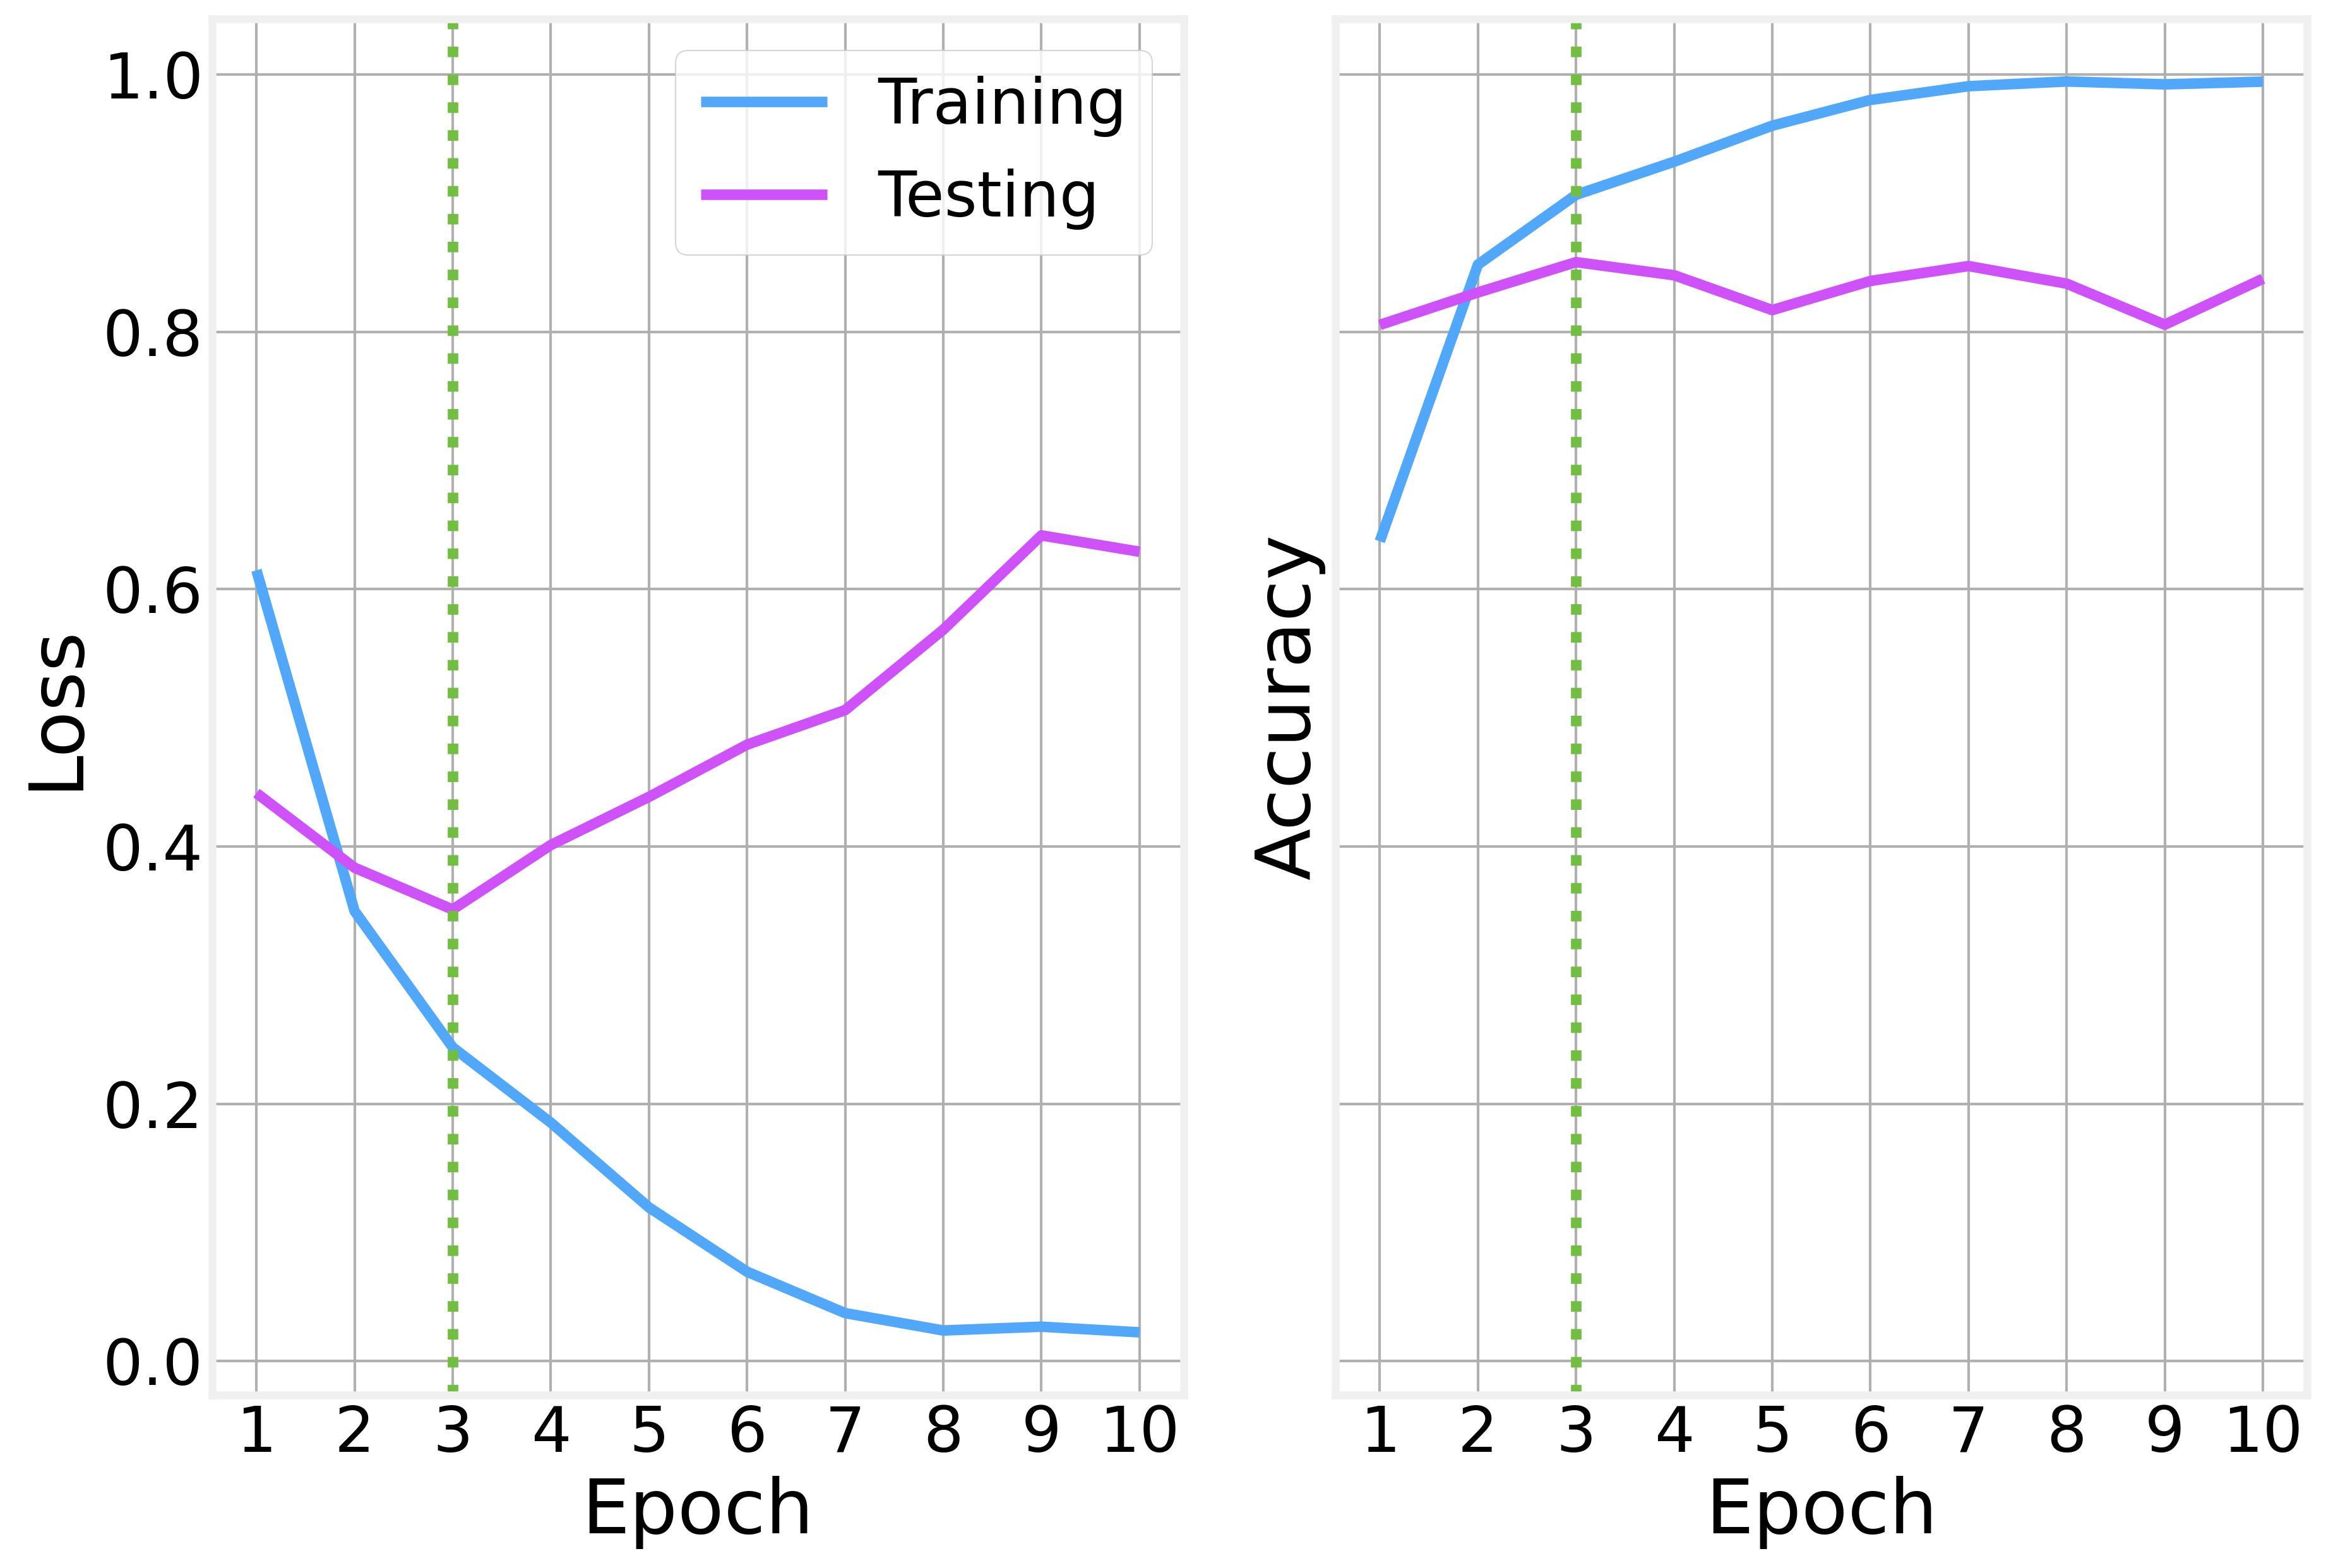

In [9]:
plot_history(history)

# GRU

In [10]:
model = Sequential()
model.add(Embedding(top_words, 32))

model.add(GRU(32))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 44s 211ms/step - loss: 0.6243 - accuracy: 0.6206 - val_loss: 0.3417 - val_accuracy: 0.8537
Epoch 2/10
196/196 [==============================] - 37s 191ms/step - loss: 0.2709 - accuracy: 0.8945 - val_loss: 0.3229 - val_accuracy: 0.8635
Epoch 3/10
196/196 [==============================] - 39s 199ms/step - loss: 0.1949 - accuracy: 0.9282 - val_loss: 0.3242 - val_accuracy: 0.8678
Epoch 4/10
196/196 [==============================] - 39s 198ms/step - loss: 0.1652 - accuracy: 0.9421 - val_loss: 0.3639 - val_accuracy: 0.8594
Epoch 5/10
196/196 [==============================] - 37s 188ms/step - loss: 0.1440 - accuracy: 0.9505 - val_loss: 0.3610 - val_accuracy: 0.8630
Epoch 6/10
196/196 [==============================] - 37s 188ms/step - loss: 0.1142 - accuracy: 0.9633 - val_loss: 0.4017 - val_accuracy: 0.8600
Epoch 7/10
196/196 [==============================] - 41s 208ms/step - loss: 0.0884 - accuracy: 0.9745 - val_loss: 0.4419 - val_ac

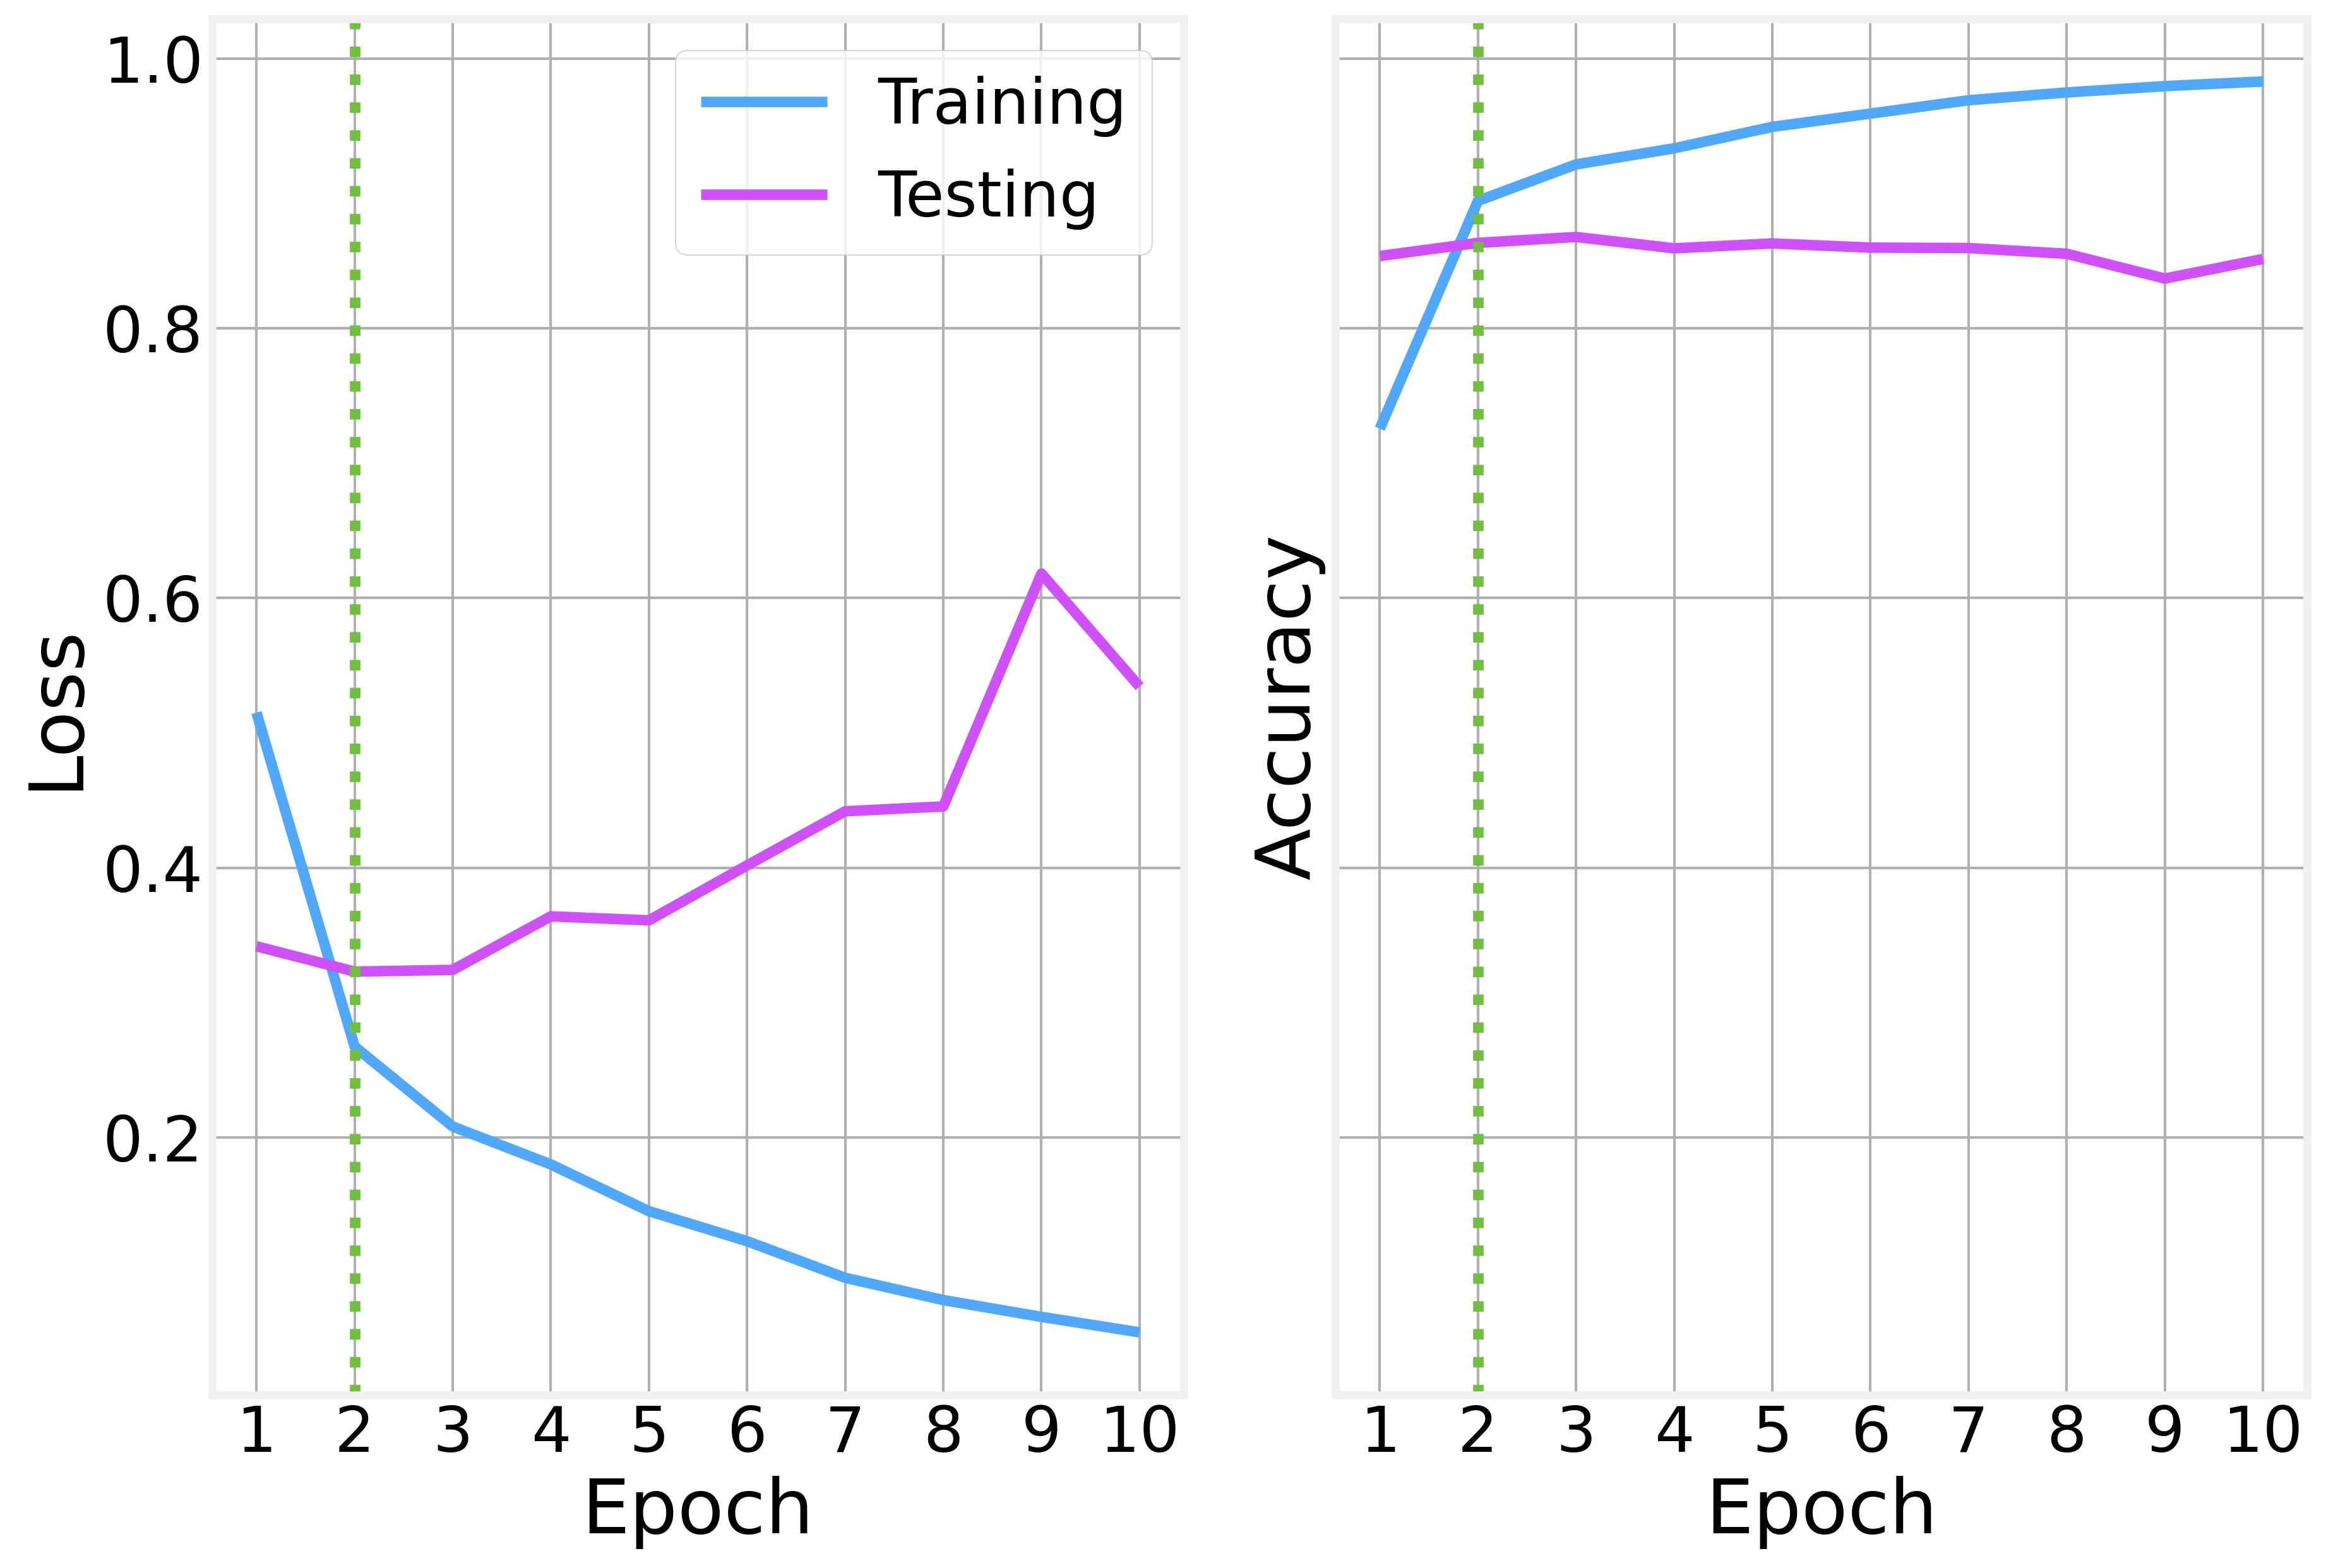

In [12]:
plot_history(history)

# LSTM

In [13]:
model = Sequential()
model.add(Embedding(top_words, 32))

model.add(LSTM(32))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 60s 295ms/step - loss: 0.6136 - accuracy: 0.6570 - val_loss: 0.3664 - val_accuracy: 0.8467
Epoch 2/10
196/196 [==============================] - 57s 293ms/step - loss: 0.2660 - accuracy: 0.8972 - val_loss: 0.2931 - val_accuracy: 0.8790
Epoch 3/10
196/196 [==============================] - 55s 282ms/step - loss: 0.1800 - accuracy: 0.9375 - val_loss: 0.3126 - val_accuracy: 0.8773
Epoch 4/10
196/196 [==============================] - 56s 284ms/step - loss: 0.1376 - accuracy: 0.9557 - val_loss: 0.3338 - val_accuracy: 0.8716
Epoch 5/10
196/196 [==============================] - 52s 267ms/step - loss: 0.1039 - accuracy: 0.9670 - val_loss: 0.3700 - val_accuracy: 0.8408
Epoch 6/10
196/196 [==============================] - 56s 286ms/step - loss: 0.1301 - accuracy: 0.9555 - val_loss: 0.3922 - val_accuracy: 0.8667
Epoch 7/10
196/196 [==============================] - 50s 257ms/step - loss: 0.0789 - accuracy: 0.9761 - val_loss: 0.4002 - val_ac

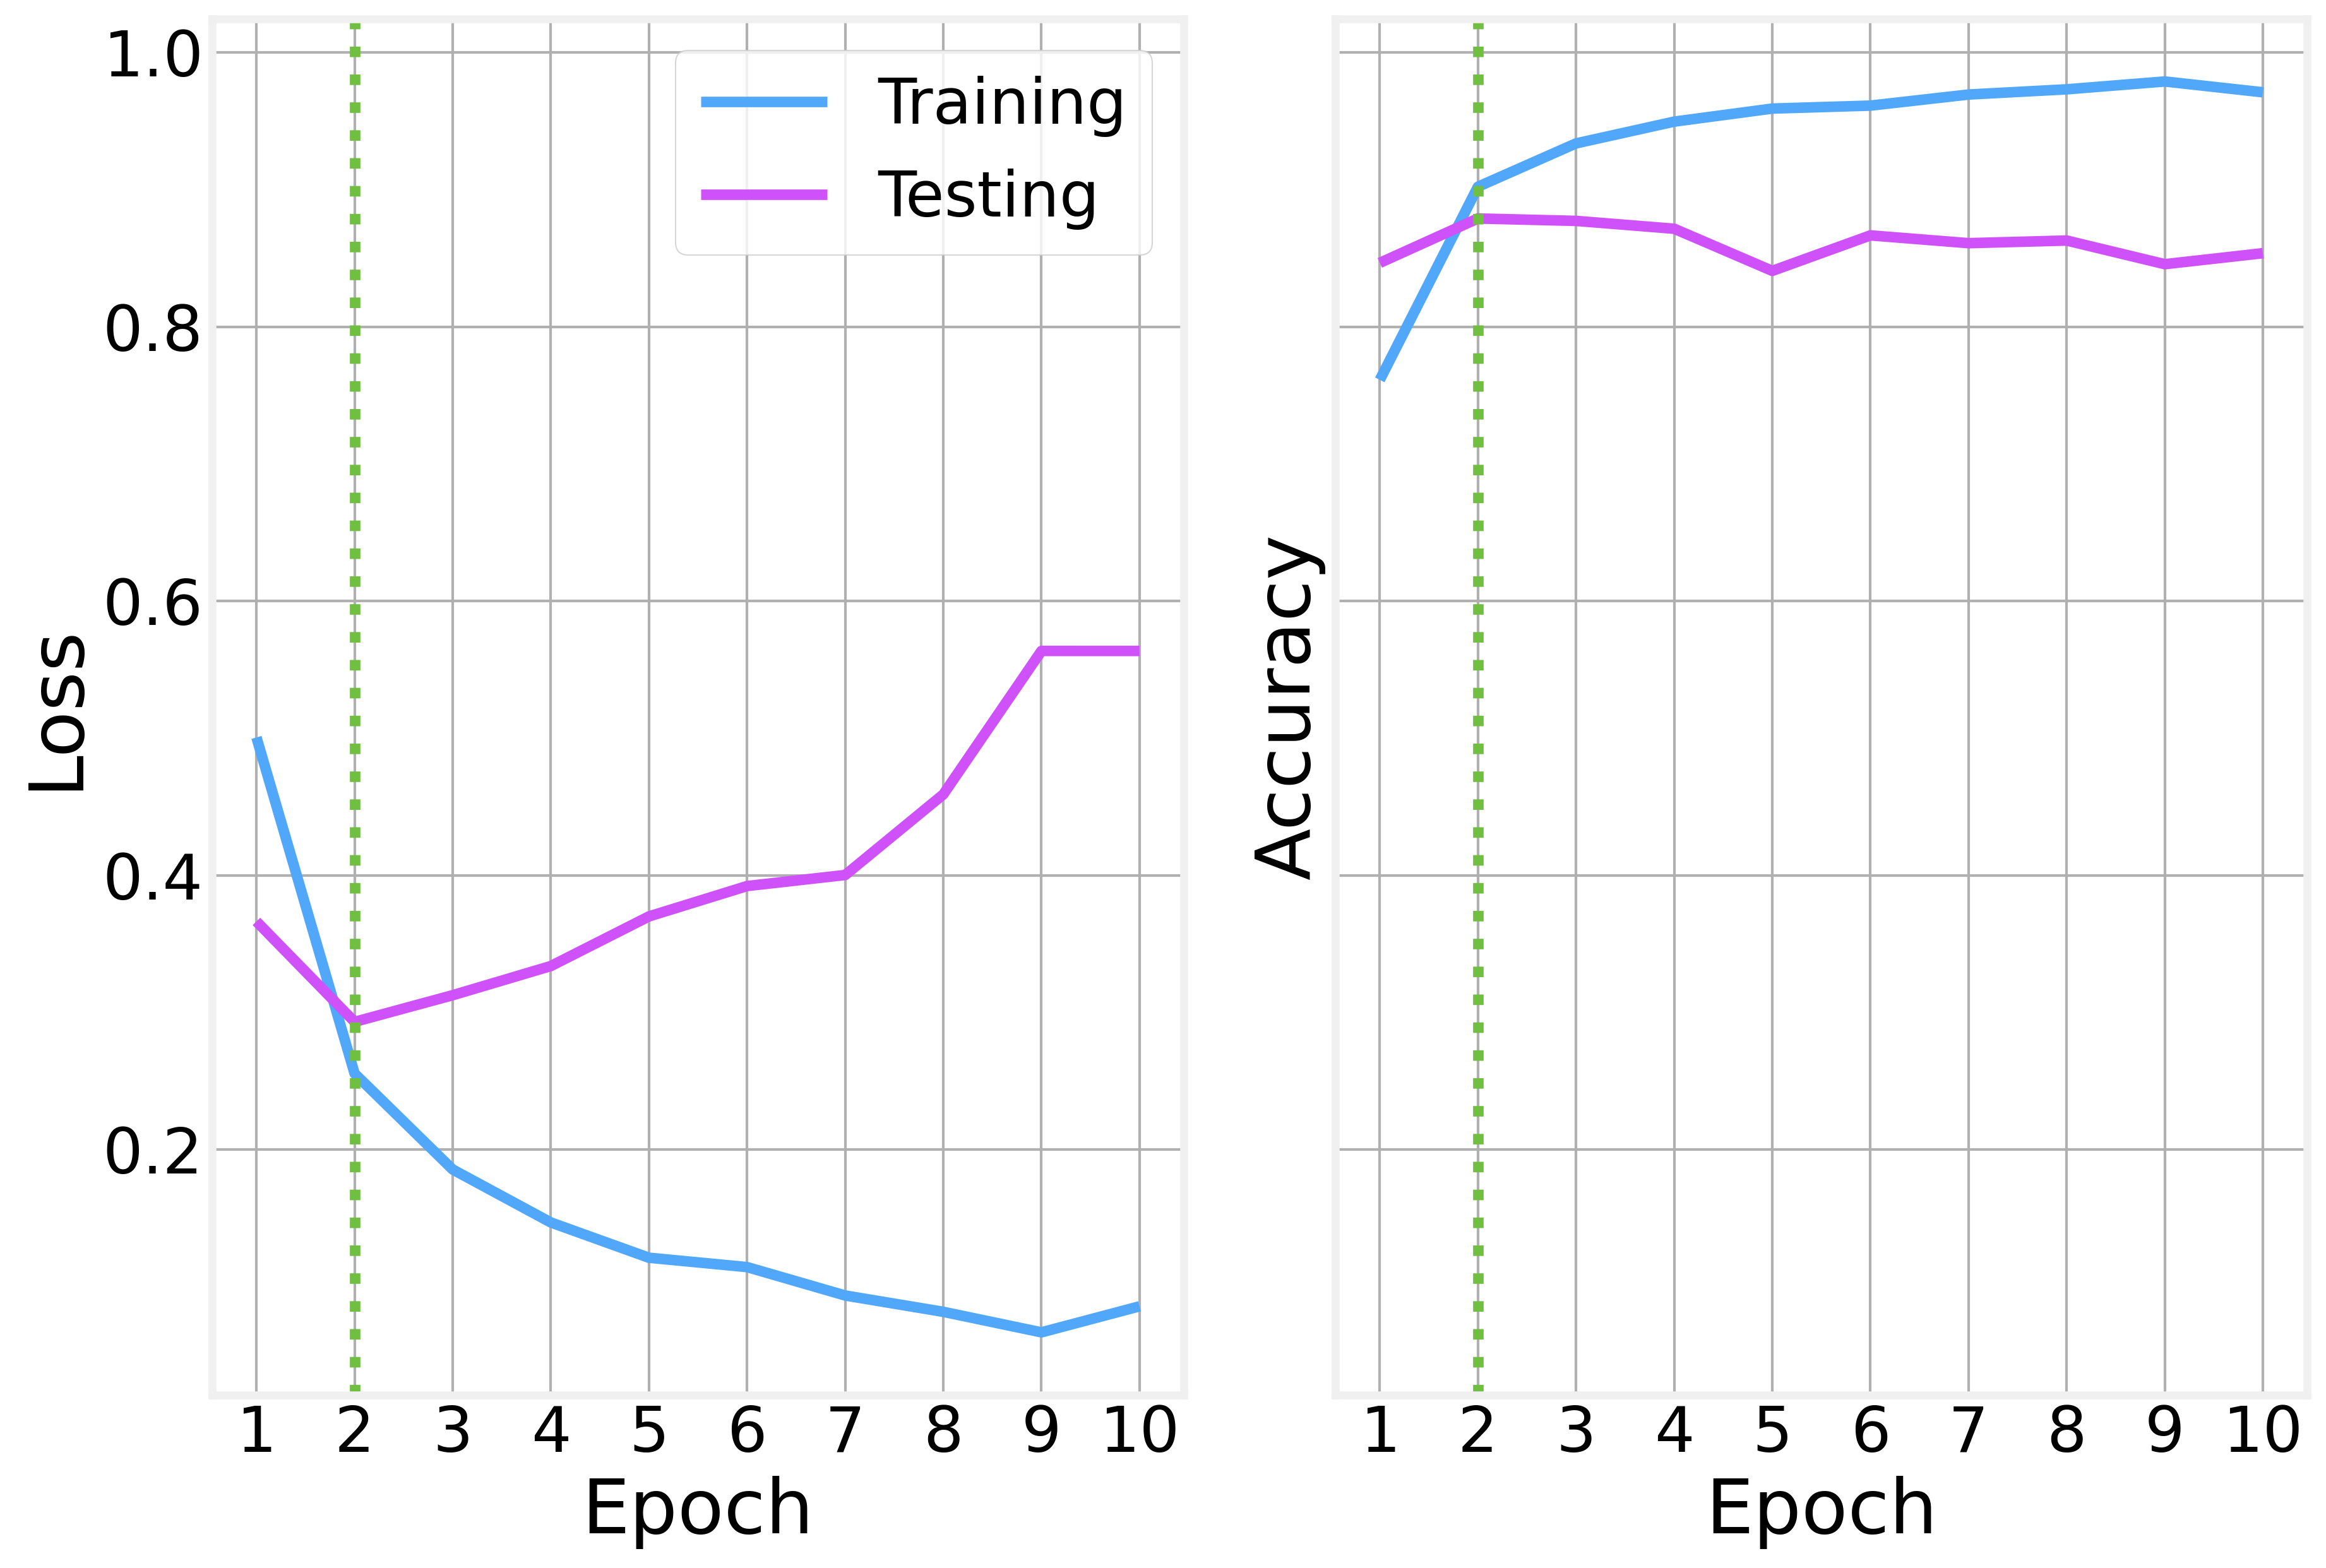

In [15]:
plot_history(history)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>